In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

## Linearly separable data

In [2]:
mat = loadmat("dado1.mat")
X = mat["X"]
y = mat["y"]

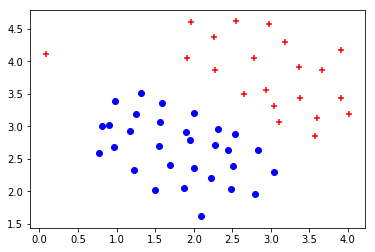

In [3]:
# Plotting data according to each class

m,n = X.shape[0], X.shape[1]
pos, neg = (y==1).reshape(m,1), (y==0).reshape(m,1)
plt.scatter(X[pos[:,0],0],X[pos[:,0],1], c='r',marker ='+')
plt.scatter(X[neg[:,0],0],X[neg[:,0],1], c='b',marker ='o')

In [4]:
from sklearn.svm import SVC

In [5]:
# np.ravel transform matrix in vector or viceversa

c=1

classifier = SVC(C=c,kernel = 'linear')

classifier.fit(X, np.ravel(y))

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

(1.5, 5)

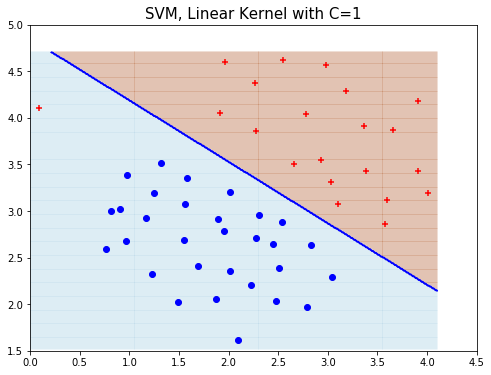

In [6]:
plt.figure(figsize = (8,6))

x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))


# 1 is the nivel

# classification of each grid value to define the boundary

bound = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
bound = bound.reshape(xx.shape)
plt.pcolormesh(xx, yy, bound,cmap=plt.cm.Paired, alpha=0.1)

plt.scatter(X[pos[:,0],0],X[pos[:,0],1], c='r',marker ='+')
plt.scatter(X[neg[:,0],0],X[neg[:,0],1], c='b',marker ='o')


plt.contour(xx,yy,classifier.predict(np.array([xx.ravel(),yy.ravel()]).T).reshape(xx.shape),1,colors="b")

plt.title('SVM, Linear Kernel with C=%i'%c,size=15)

plt.xlim(0,4.5)
plt.ylim(1.5,5)

## Non linearly separable data

In [7]:
mat = loadmat("dado2.mat")
X_train_orig = mat["X"]
y_train = mat["y"]
X_val_orig = mat["Xval"]
y_val = mat["yval"]

In [8]:
def featureNormalize(X):
    #axis=0 means by column
    mu = np.mean(X,axis=0)
    sigma = np.std(X,axis=0)
    
    X_norm = (X-mu)/sigma
    
    return X_norm,mu,sigma

In [9]:
# Normalizing each X value

X_train, mu_train, sigma_train = featureNormalize(X_train_orig)
X_val, mu_val, sigma_val = featureNormalize(X_val_orig)

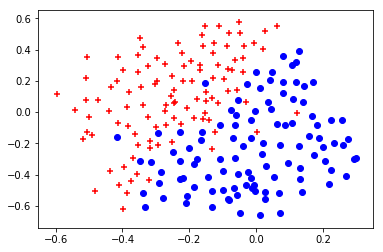

In [10]:
# plotting training data

m,n = X_train.shape[0], X_train.shape[1]
pos, neg = (y_train==1).reshape(m,1), (y_train==0).reshape(m,1)
pos_val, neg_val = (y_val==1).reshape(X_val.shape[0],1), (y_val==0).reshape(X_val.shape[0],1)
plt.scatter(X_train_orig[pos[:,0],0],X_train_orig[pos[:,0],1], c='r',marker ='+')
plt.scatter(X_train_orig[neg[:,0],0],X_train_orig[neg[:,0],1], c='b',marker ='o')

In [19]:
c= 5
sigma = 1
gamma=1/(2*sigma)

# gaussian kernel
classifier = SVC(C=c,kernel='rbf', gamma=gamma)

# np.ravel transform matrix in vector or viceversa
classifier.fit(X_train, np.ravel(y_train))

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Text(0.5, 1.0, 'SVM for training data C=5.000000, sigma=1.000000')

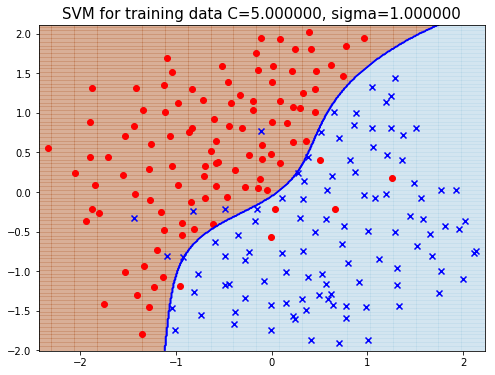

In [20]:
plt.figure(figsize = (8,6))
x_min, x_max = X_train[:, 0].min() - 0.1, X_train[:, 0].max() + 0.1
y_min, y_max = X_train[:, 1].min() - 0.1, X_train[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))


# 1 is the nivel

# classification of each grid value to define the boundary

bound = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
bound = bound.reshape(xx.shape)
plt.pcolormesh(xx, yy, bound,cmap=plt.cm.Paired, alpha=0.15)

plt.scatter(X_train[neg[:,0],0],X_train[neg[:,0],1], c='blue',marker ='x')
plt.scatter(X_train[pos[:,0],0],X_train[pos[:,0],1], c='red',marker ='o')

plt.contour(xx,yy,classifier.predict(np.array([xx.ravel(),yy.ravel()]).T).reshape(xx.shape),1,colors="b")


plt.title('SVM for training data C=%f'%c +', sigma=%f'%sigma, size=15)


In [21]:
mt = X_train.shape[0]
ma= X_val.shape[0]
accuracyt = (sum(classifier.predict(X_train)[:,np.newaxis]==y_train)[0]/mt)*100
accuracya = (sum(classifier.predict(X_val)[:,np.newaxis]==y_val)[0]/ma)*100
print('Training Set Accuracy:',accuracyt,'%')
print('Validation Set Accuracy:',accuracya,'%')

Training Set Accuracy: 94.3127962085308 %
Validation Set Accuracy: 91.0 %


In [22]:
# Finding ideal hiperparameters gamma and C

def idealHiperparameters(Cs, gammas, X_train, y_train, X_val, y_val):
    
    accuracy = np.zeros((len(Cs),len(gammas)))
    m = X_val.shape[0]
    
    for i in range(len(Cs)):
        for j in range(len(gammas)):
            classifier = SVC(C=Cs[i],kernel='rbf', gamma=1/(2*gammas[j]))
            classifier.fit(X_train, np.ravel(y_train))
            acc= 1-sum(classifier.predict(X_val)[:,np.newaxis]==y_val)[0]/m
            accuracy[i,j] = acc
            
    min_i = np.where(accuracy == np.min(accuracy))[0][0]
    min_j = np.where(accuracy == np.min(accuracy))[1][0]
    
    return Cs[min_i], gammas[min_j], accuracy[min_i,min_j]
            
    

In [24]:
# Cs values
Cs = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
#values of sigma
gammas = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]

idealC, idealGamma, error = idealHiperparameters(Cs, gammas, X_train, y_train, X_val, y_val)

print('The ideal hiperparameters are C=%f'%idealC+'sigma=%f'%idealGamma+', with validation error=%f'%error)

The ideal hiperparameters are C=10.000000sigma=0.300000, with validation error=0.075000


In [25]:
# Training with optimal hiperparameters

classifier = SVC(C=idealC,kernel='rbf', gamma=idealGamma)
# np.ravel transform matrix in vector or viceversa
classifier.fit(X_train, np.ravel(y_train))

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.3, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Text(0.5, 1.0, 'SVM for validation data for C=10.000000, sigma=0.300000')

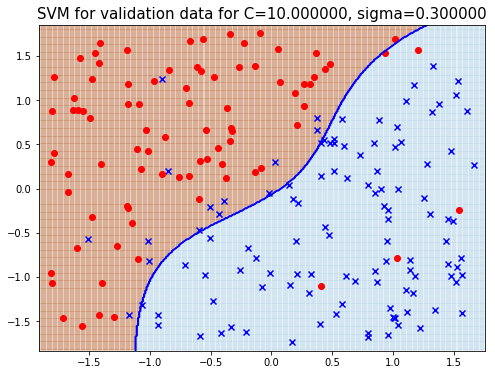

In [26]:
# Validation test according to ideal C and ideal sigma

plt.figure(figsize = (8,6))

# ticks

x_min, x_max = X_val[:, 0].min() - 0.1, X_val[:, 0].max() + 0.1
y_min, y_max = X_val[:, 1].min() - 0.1, X_val[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))


# 1 is the nivel

# classification of each grid value to define the boundary

bound = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
bound = bound.reshape(xx.shape)
plt.pcolormesh(xx, yy, bound,cmap=plt.cm.Paired, alpha=0.15)

plt.scatter(X_val[neg_val[:,0],0],X_val[neg_val[:,0],1], c='blue',marker ='x')
plt.scatter(X_val[pos_val[:,0],0],X_val[pos_val[:,0],1], c='red',marker ='o')

plt.contour(xx,yy,classifier.predict(np.array([xx.ravel(),yy.ravel()]).T).reshape(xx.shape),1,colors="b")


plt.title('SVM for validation data for C=%f'%idealC +', sigma=%f'%idealGamma,size=15)



Text(0.5, 1.0, 'SVM for training data with C=10.000000, sigma=0.300000')

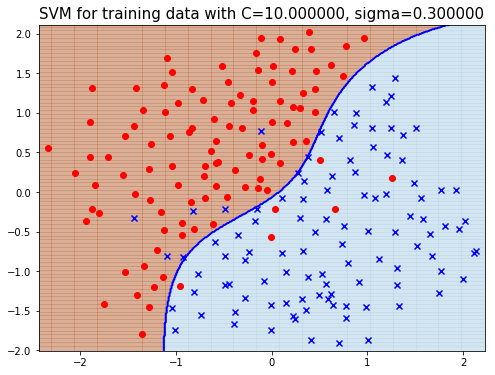

In [28]:
# training test according to ideal C and ideal sigma

plt.figure(figsize = (8,6))

# ticks

x_min, x_max = X_train[:, 0].min() - 0.1, X_train[:, 0].max() + 0.1
y_min, y_max = X_train[:, 1].min() - 0.1, X_train[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))


# 1 is the nivel

# classification of each grid value to define the boundary

bound = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
bound = bound.reshape(xx.shape)
plt.pcolormesh(xx, yy, bound,cmap=plt.cm.Paired, alpha=0.15)

plt.scatter(X_train[neg[:,0],0],X_train[neg[:,0],1], c='blue',marker ='x')
plt.scatter(X_train[pos[:,0],0],X_train[pos[:,0],1], c='red',marker ='o')

plt.contour(xx,yy,classifier.predict(np.array([xx.ravel(),yy.ravel()]).T).reshape(xx.shape),1,colors="b")


plt.title('SVM for training data with C=%f'%idealC +', sigma=%f'%idealGamma,size=15)
